<a href="https://colab.research.google.com/github/zcvpal2/Aiffel-follow-deep-learning/blob/main/6_%EA%B1%B0%EC%9A%B8%EC%95%84_%EA%B1%B0%EC%9A%B8%EC%95%84_(3)_%EC%A0%84%EC%9D%B4_%ED%95%99%EC%8A%B5_%EB%AA%A8%EB%8D%B8_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

dataset = 'cats_vs_dogs'
DATA_DIR = '/content/drive/MyDrive/AIFFEL'
setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    dataset,
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    data_dir=DATA_DIR,  
    with_info=True,
    as_supervised=True,)

IMG_SIZE = 160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label


train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

BATCH_SIZE = 32
SHUFFLE = 1000

train_batches = train.shuffle(SHUFFLE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

for image_batch, label_batch in train_batches.take(1):
  pass


IMG_SHAPE = (IMG_SIZE, IMG_SIZE,3)

base_model = tf.keras.applications.VGG16(input_shape = IMG_SHAPE,
                                         include_top = False,
                                         weights = 'imagenet')

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch = base_model(image_batch)
feature_batch_average = global_average_layer(feature_batch)

dense_layer = tf.keras.layers.Dense(512, activation ='relu')
prediction_layer = tf.keras.layers.Dense(2, activation='softmax')

prediction_batch = prediction_layer(dense_layer(feature_batch_average))

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    global_average_layer, 
    dense_layer, 
    prediction_layer 
])


58900480/58889256 [==============================] - 1s 0us/step


In [2]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [3]:
validation_steps=20
loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

20/20 [==============================] - 3s 81ms/step - loss: 0.7504 - accuracy: 0.5297
initial loss: 0.75
initial accuracy: 0.53


In [4]:
EPOCHS = 5   
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/5
582/582 [==============================] - 79s 132ms/step - loss: 0.2557 - accuracy: 0.9088 - val_loss: 0.1711 - val_accuracy: 0.9291
Epoch 2/5
582/582 [==============================] - 77s 130ms/step - loss: 0.1596 - accuracy: 0.9365 - val_loss: 0.1508 - val_accuracy: 0.9364
Epoch 3/5
582/582 [==============================] - 77s 129ms/step - loss: 0.1458 - accuracy: 0.9393 - val_loss: 0.1498 - val_accuracy: 0.9334
Epoch 4/5
582/582 [==============================] - 77s 130ms/step - loss: 0.1396 - accuracy: 0.9420 - val_loss: 0.1406 - val_accuracy: 0.9398
Epoch 5/5
582/582 [==============================] - 78s 130ms/step - loss: 0.1342 - accuracy: 0.9464 - val_loss: 0.1613 - val_accuracy: 0.9329


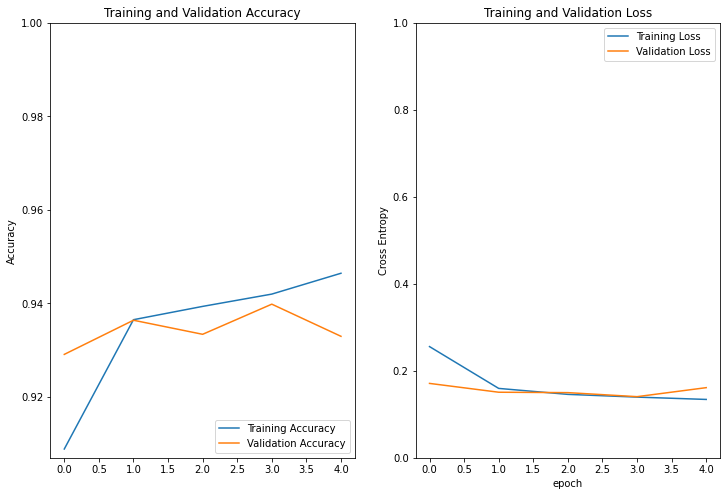

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [6]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    pass

predictions

array([[9.99980211e-01, 1.97871195e-05],
       [5.91221265e-02, 9.40877855e-01],
       [1.48949072e-01, 8.51050913e-01],
       [9.99989629e-01, 1.03201055e-05],
       [9.93859649e-01, 6.14036759e-03],
       [9.72039640e-01, 2.79602818e-02],
       [7.98962355e-05, 9.99920130e-01],
       [3.76999795e-01, 6.23000205e-01],
       [8.72522652e-01, 1.27477363e-01],
       [9.09172058e-01, 9.08279642e-02],
       [2.13783405e-05, 9.99978662e-01],
       [9.99897957e-01, 1.02057056e-04],
       [9.75138783e-01, 2.48612650e-02],
       [1.67215217e-06, 9.99998331e-01],
       [9.95513260e-01, 4.48674662e-03],
       [9.65463698e-01, 3.45362574e-02],
       [9.92530763e-01, 7.46920751e-03],
       [8.60812236e-03, 9.91391897e-01],
       [3.41806024e-01, 6.58193946e-01],
       [9.87045228e-01, 1.29547557e-02],
       [8.22312117e-01, 1.77687958e-01],
       [9.46552336e-01, 5.34476116e-02],
       [9.84502971e-01, 1.54970940e-02],
       [9.50841844e-01, 4.91581969e-02],
       [9.960015

In [7]:
import numpy as np
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

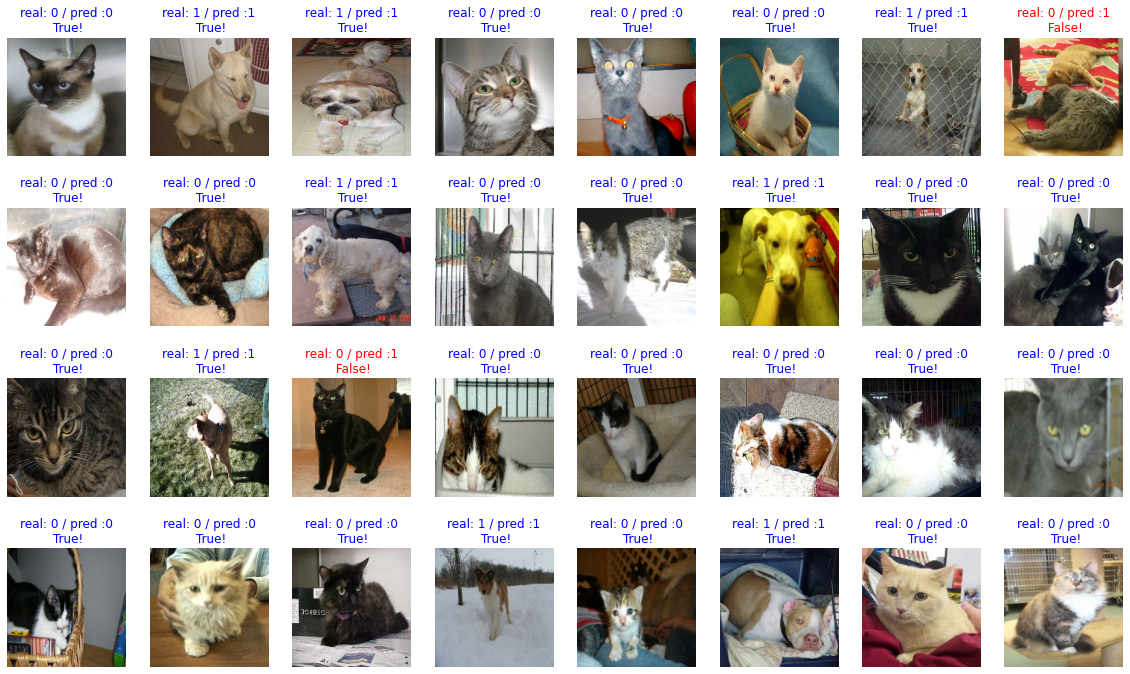

In [8]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')

In [9]:
count = 0
for image, label, prediction in zip(images, labels, predictions):
    correct = label == prediction
    if correct:
        count = count + 1

print(count / 32 * 100)

93.75


In [10]:
## 모델 save load

In [20]:
## save_weight 함수 사용 하고 결과를 저장하고 싶은 경로만 지정하면 된다

import os 

checkpoint_dir = os.getenv("HOME") + "/content/drive/MyDrive/AIFFEL/cats_vs_dogs"
checkpoint_file_path = os.path.join(checkpoint_dir, 'checkpoint')

if not os.path.exists('checkpoint_dir'):
  os.mkdir('checkpoint_dir')

model.save_weights(checkpoint_file_path)

if os.path.exists(checkpoint_file_path):
  print("checkpoint 파일 생성")

checkpoint 파일 생성


In [12]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


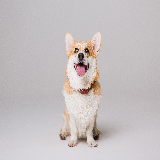

In [18]:
## 이미지가 저장되어 있는 경로에서 이미지를 가져와 사용할 수 있는 160*160사이즈로 변경
IMG_SIZE = 160
img_dir_path = "/content/drive/MyDrive/AIFFEL/cats_vs_dogs/images"
dog_image_path = os.path.join(img_dir_path, 'my_dog.jpg')

dog_image = load_img(dog_image_path, target_size=(IMG_SIZE, IMG_SIZE))
dog_image

In [21]:
dog_image = img_to_array(dog_image).reshape(1, IMG_SIZE, IMG_SIZE, 3)
dog_image.shape

(1, 160, 160, 3)

In [22]:
prediction = model.predict(dog_image)
prediction

array([[4.677289e-19, 1.000000e+00]], dtype=float32)

In [28]:
def show_and_predict_image(dirpath, filename, img_size=160): ## 예측을 위한 과정을 함수로 만들어
    filepath = os.path.join(dirpath, filename)
    image = load_img(filepath, target_size=(img_size, img_size))
    plt.imshow(image)
    plt.axis('off')
    image = img_to_array(image).reshape(1, img_size, img_size, 3)
    prediction = model.predict(image)[0]
    cat_percentage = round(prediction[0] * 100)
    dog_percentage = round(prediction[1] * 100)
    print(f"This image seems {dog_percentage}% dog, and {cat_percentage}% cat.")



This image seems 100% dog, and 0% cat.


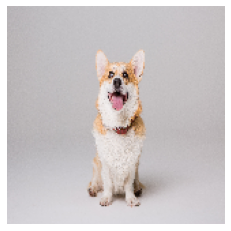

In [29]:
filename = 'my_dog.jpg' #강아지일 경우를 한번 예측해보면

show_and_predict_image(img_dir_path, filename)

This image seems 0% dog, and 100% cat.


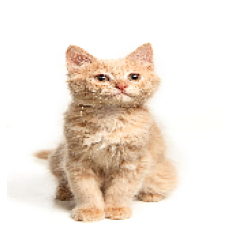

In [30]:
filename = 'my_cat.jpg'

show_and_predict_image(img_dir_path, filename)

This image seems 0% dog, and 100% cat.


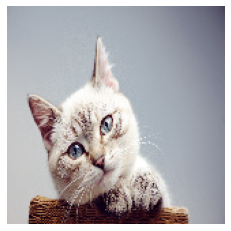

In [31]:
filename = "cat_face.jpg"
show_and_predict_image(img_dir_path, filename)